(1) Use a BeautifulSoap search for the three keywords, e.g., (“ChatGPT” and “Reinforcement Learning”) or (“Long Covid” and “Booster shot”) and download 50 articles title from the search result, via web scraping.

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
def get_title(url, block_element, cls):
    # Send a request to the search page with given url
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    mycls = soup.find_all(block_element, class_= cls)
    i = 1
    title_list = []
    for element in mycls:
        if i <= 50:
            title_list.append(element.text) 
            i += 1
        else:
            break
    return title_list

In [8]:
# Neural Network
nn_list = get_title('https://news.google.com/search?q=Neural%20Network&hl=en-US&gl=US&ceid=US%3Aen', 
                    'a',
                    'DY5T1d RZIKme')
# Deep Learning
dl_list = get_title('https://news.google.com/search?q=Deep%20Learning&hl=en-US&gl=US&ceid=US%3Aen',
                   'a',
                   'DY5T1d RZIKme')
    
# Reinforcement Learning
rl_list = get_title('https://news.google.com/search?q=Reinforcement%20Learning&hl=en-US&gl=US&ceid=US%3Aen', 
                   'a',
                   'DY5T1d RZIKme')

(2) Stores the downloaded articles’ title and abstract on your local drive in a standard file format, e.g., CSV, XML, SQL, or JSON.

In [11]:
import pandas as pd

In [13]:
total_list = nn_list + dl_list + rl_list
df = pd.DataFrame({'title': total_list})
df.to_csv('title in google news.csv')

(3) Write a script to look at the title of each article and count the occurrences of the three given words. For example, “ChatGPT”, “Diffusion Models”, and “Reinforcement Learning”. Then, create a word frequency histogram.

In [24]:
import matplotlib.pyplot as plt

In [23]:
combined_list = ' '.join(total_list)
nn_freq = combined_list.lower().count('neural network')
dl_freq = combined_list.lower().count('deep learning')
rl_freq = combined_list.lower().count('reinforcement learning')

In [28]:
rl_freq

13

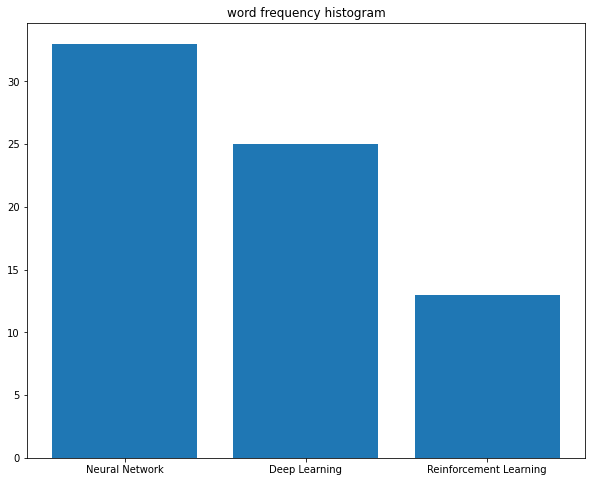

In [33]:
plt.figure(figsize=(10,8))
plt.bar(['Neural Network', 'Deep Learning', 'Reinforcement Learning'], [nn_freq, dl_freq, rl_freq])
plt.title('word frequency histogram')
plt.show()